<H1>Introduction to Python</H1>

# 1.  Files Manipulation

## 1.1 Paths

### 1.1.1 Working with paths

How to use the Path class from pathlib to handle filesystem paths. We'll look at how to define paths, navigate through directories, and access path attributes.

In [7]:
from pathlib import Path

current_file = Path("Chapter 03 - Introduction to Python.ipynb").resolve()
print(f"current file: {current_file}")

current_dir = current_file.parent
print(f"current directory: {current_dir}")

data_dir = current_dir.parent / "data"
print(f"data directory: {data_dir}")

current file: C:\Users\SILRE\Python_Learning_Sessions\Chapter 03 - Introduction to Python.ipynb
current directory: C:\Users\SILRE\Python_Learning_Sessions
data directory: C:\Users\SILRE\data


### 1.1.2 Checking if path exists


Understand the methods to verify the existence of a given path, and whether it's a file or a directory.

In [8]:
print(f"exists: {data_dir.exists()}")
print(f"is file: {data_dir.is_file()}")
print(f"is directory: {data_dir.is_dir()}")

exists: True
is file: False
is directory: True


To start reading a file, one creates a **file object** using `open` function with `mode='r'` .    


<br>

## 1.2 File opening modes


When using the `open()` function, a **mode** can be passed as argument to the function. This specifies the type of access you will have on the file. For instance, the `'r'` mode will only allow to read the content of a file, and will not allow writing to it (this is useful to avoid accidental writing to the file).

There are several possible modes when opening files:
* `'r'`: open file in read-only mode.
* `'w'`: open file in write-only mode, **overwriting** an existing file with the same name.
* `'a'`: open file in write-only mode, **appending** to an existing file with the same name
  (otherwise the file is created).
* `'rb'`, `'wb'`, `'ab'`: same as `'r'`, `'w'` and `'a'`, but reading/writing to/from binary files (such as `.zip` or `.bmp` image files). 
  The content is read/written as bytes objects without any decoding.

See `help(open)` or the [python online documentation](https://docs.python.org/3/library/functions.html#open) for a full list of modes and details about them.

<br>

### 1.2.1 Reading from files


To start reading a file, one creates a **file object** using `open` function with `mode='r'` .    


#### 1.2.1.1 Reading lines manually <a id='3.1'></a>

When reading a file with python, you have to consider your **file object** a little bit like a cursor which starts at the very beginning of your file, and progresses toward the end of the file (it can go backward, but it is often a bit hacky to do so).

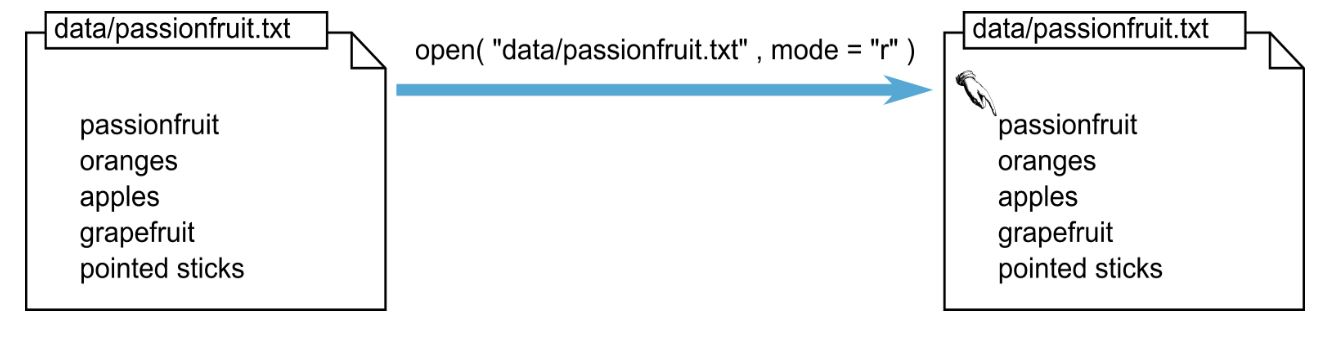

<br>


You can read elements (ie. make the cursor advance) using the following methods:
 * **`.readline()`**: the most common, reads a single line
 * **`.read()`**: reads the rest of the file in one go
 * **`.readlines()`**: reads the rest of the file in one go, and put each line as an element in a list
 
Each method returns the text it read as a `str`.

> The methods return `str` objects: this means that if you read number and want to use it as a `float` (e.g. to do math with it), you will need to convert it from `str` to `float` first (with `float(x)`).

We will focus on `.readline()` the most used. When we call it, the file pointer progresses to the next line and returns what was just read


When we call `.readline()` again, we get a new line as the pointer continues progressing along the file.


Once there is no more line to read, `.readline()` returns an empty string (`""`)



In [13]:
with open("data/fresh_fruits.txt" , mode="r") as reading_handle:

    line = reading_handle.readline() # This function reads a single line from the file.
    print(line)                      # Print the line to the screen.

    line = reading_handle.readline()
    print("line:")
    print(line) 
    line = reading_handle.readline()
    print("line:")
    print(line) 
    line = reading_handle.readline()
    print("line:")
    print(line) 
    line = reading_handle.readline()
    print("line:")
    print(line) 
    # problem : how many time should I do this ?

    line = reading_handle.readline()
    print("line:")
    print(line) 
    line = reading_handle.readline()
    print("line:")
    print(line) 
    line = reading_handle.readline()
    print("line:")
    print(line) 


passionfruit

line:
oranges

line:
apples

line:
grapefruit (whole and segments)

line:
pointed sticks
line:

line:

line:



Remember: once there is no more line to read, `.readline()` returns an empty string (`''`)


Using a **`for` loop** to read the file makes this a much tidier code:
* Each iteration reads 1 line.
* The for loop ends when the entire file was read (because at this point the `line` variable in the
  example below will contain `""`, which evaluates to `False` in python).

In [20]:
with open("data/fresh_fruits.txt" , mode='r') as reading_handle:
    i = 0
    for line in reading_handle:
        print("line", i, ":", line)
        i += 1


line 0 : passionfruit

line 1 : oranges

line 2 : apples

line 3 : grapefruit (whole and segments)

line 4 : pointed sticks


<br>

#### 1.2.1.2 End-of-line characters  <a id='3.2'></a>
As you can see in the example above, there are additional empty lines in between our prints. This is because the lines are read from the file with their **end-of-line** characters, which generally is `\n` .  

To avoid this issue, one typically uses the **`.strip()`** method of strings, which removes any whitespace or end-of-line character at the start or end of the string.

**Example:** using `.strip()` when reading content from a file.

In [15]:
with open("data/fresh_fruits.txt", 'r') as reading_handle:

    for i, line in enumerate(reading_handle):  # enumerate() is our friend that will automatically enumerate items
        print("line", i, ":", line.strip())    # Note: we use the "strip()" method of "str" to remove the 
                                               # trailing "\n" (carriage return) of each line.


line 0 : passionfruit
line 1 : oranges
line 2 : apples
line 3 : grapefruit (whole and segments)
line 4 : pointed sticks


<br>



### 1.2.2 Writing to files  <a id='4'></a>
Writing to a file is achieved in pretty much the same way as reading from it, but the opening mode is now **`"w"`**.  
And instead of reading lines, we now `print()` them to the file.

In [12]:
help(print)

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.



In [19]:
with open("shopping_list.txt", mode="w") as f:
    print("onion", file=f)
    print(34, "potato", file=f)
    print("shrubbery", file=f)
    print("tomato sauce", file=f)


By passing the file object (or file handle) to the **`file` argument** of the `print()` function, we now print to the file rather than to our terminal.
> **Reminder**: the **`"w"`** mode **overwrites** the opened file - if you use it on an existing file,
  its original content is lost.

> **Pro tip:** you can open more than one file using a single `with` statement by using multiple
  context managers in the same code block:
> * Either on the same line:
  ```python
    with open("input.txt", 'r') as in_file, open("output.txt", 'w') as out_file:
        do_something()
  ```
  
>  * Or by having one context manager per line, and enclosing them all in parentheses `()`
    as shown below (better for readability) - *note: this only works with python >= 3.10* :
  ```python
    with (
        open("input.txt", 'r') as in_file,
        open("output.txt", 'w') as out_file,
    ):
        do_something()
  ```

<div style="background-color: #f0f0f0; padding: 10px; border: 1px solid #blue;">

<strong>(!)</strong> Additional info

You might sometimes see some Python code - especially older ones - that uses the **`.write()`** method of the **file object**.

There are some differences between the `print()` method and `.write()`; the most important one is that `.write()` will not do any formatting and even the end-of-line (carriage return) characters need to be manually written.

</div>

In [18]:
with open("shopping_list2.txt", mode="w") as f:
    f.write("onion\n")
    f.write("{} potato\n".format(34))
    f.write("shrubbery\n")
    f.write("tomato sauce\n")
    

----------------------------------------------------------------------------------------------------


## 2. Exceptions
When something goes wrong an exception is raised. For example, if you try to divide by zero, `ZeroDivisionError` is raised or if you try to access a nonexistent key in a dictionary, `KeyError` is raised.



In [ ]:
empty_dict = {}
# empty_dict['key']  # Uncomment to see the traceback

### 2.1 `try-except` structure 
If you know that a block of code can fail in some manner, you can use `try-except` structure to handle potential exceptions in a desired way.

In [17]:
# Let's try to open a file that does not exist
file_name = "not_existing.txt"

try:
    with open(file_name) as my_file:
        print("File is successfully open")

except FileNotFoundError as e:
    print(f"Uups, file: {file_name} not found")
    print(f"Exception: {e} was raised")

Uups, file: not_existing.txt not found
Exception: [Errno 2] No such file or directory: 'not_existing.txt' was raised


If you don't know the type of exceptions that a code block can possibly raise, you can use `Exception` which catches all exceptions. In addition, you can have multiple `except` statements.

In [21]:
def calculate_division(var1, var2):
    result = 0

    try:
        result = var1 / var2
    except ZeroDivisionError as ex1:
        print("Can't divide by zero")
    except Exception as ex2:
        print(f"Exception: {ex2}")

    return result


result1 = calculate_division(3, 3)
print(f"result1: {result1}")

result2 = calculate_division(3, "3")
print(f"result2: {result2}")

result3 = calculate_division(3, 0)
print(f"result3: {result3}")

result1: 1.0
Exception: unsupported operand type(s) for /: 'int' and 'str'
result2: 0
Can't divide by zero
result3: 0


`try-except` can be also in outer scope:

In [22]:
def calculate_division(var1, var2):
    return var1 / var2


try:
    result = calculate_division(3, "3")
except Exception as e:
    print(e)

unsupported operand type(s) for /: 'int' and 'str'


<br>
<br>
## 3. Perl vs Python - Syntax

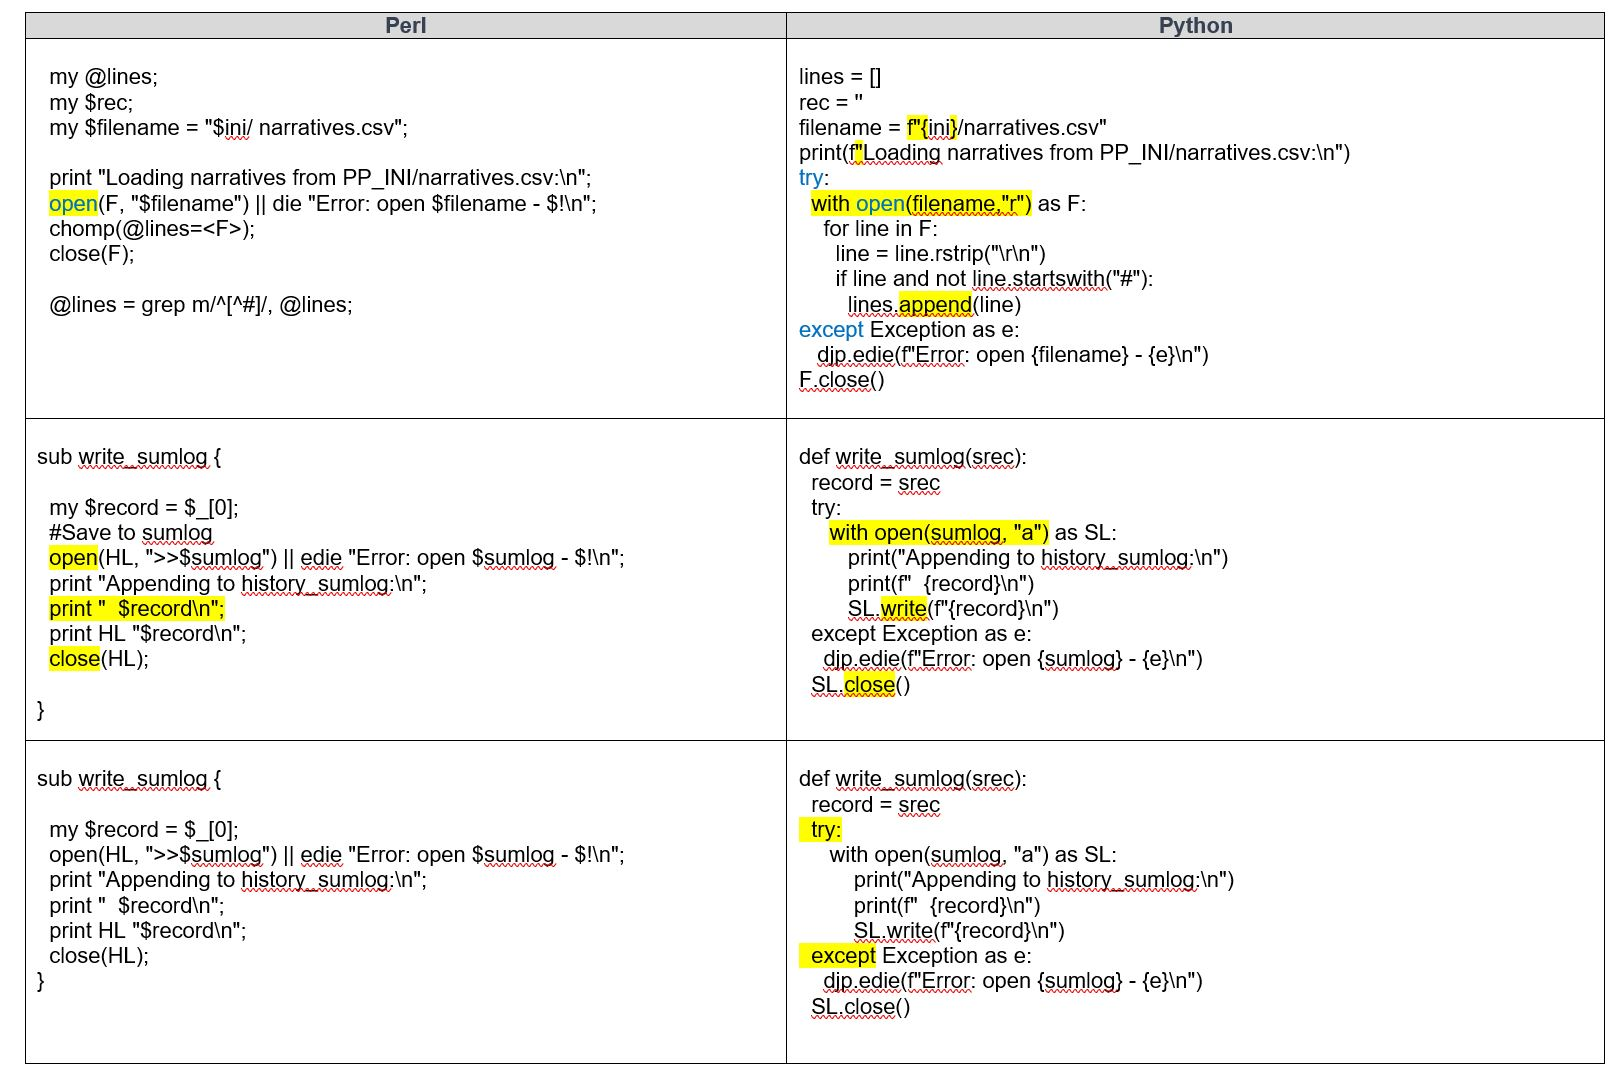




File manipulation in Perl and Python has several key differences:

<strong>File Opening and Reading</strong>:

 <u>Perl</u>: In Perl, you typically use the open() function to open a file, read its contents line by line using filehandles, and close the file with close(). For example, open(F, "filename.txt").

 <u>Python</u>: Python uses a more modern and convenient approach with the with statement to open files. You use the open() function as a context manager, which automatically handles closing the file when done. You can read lines with a for loop or use methods like read() to read the entire file.

<strong>String Interpolation</strong>:

<u>Perl</u>: Perl uses different string interpolation methods, such as double-quoted strings that allow variable substitution, e.g., "Hello, $name!".

<u>Python</u>: Python uses f-strings (formatted string literals) for string interpolation, making it more concise and readable, e.g., f"Hello, {name}!".

<strong>File Writing:

<u>Perl</u>: In Perl, you can write to a file using the print function or by opening the file in write mode (">") or append mode (">>") and using print.

<u>Python</u>: Python offers various modes for file writing, like "w" for write and "a" for append. You can write to files using the write() method or print() function with file redirection.

<strong>Error Handling</strong>:

<u>Perl</u>: Perl typically uses die statements to handle file-related errors. For example, die "Error: $!" to display an error message and exit.

<u>Python</u>: Python uses try-except blocks for error handling, providing more flexibility and structured error messages. For example, except Exception as e:.

<strong>File Path Manipulation</strong>:

<u>Perl</u>: Perl has its own methods for manipulating file paths, such as File::Basename. You might need to use platform-specific path separators (\ or /).

<u>Python</u>: Python provides the os.path module for file path manipulation, which is more cross-platform and intuitive. For example, os.path.join() for joining paths.

<strong>Encoding and Unicode</strong>:

<u>Perl</u>: Perl handles character encoding and Unicode differently, and you might need to explicitly deal with character encodings.

<u>Python</u>: Python 3 has better built-in support for Unicode and character encoding, making it easier to work with text files containing different character sets.

<H1>References</H1>

[1] https://en.wikipedia.org/wiki/History_of_Python